In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
start = '2013-01-01'
end = '2023-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.747721,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.536320,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.075710,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.981151,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.024162,458707200


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [4]:
df = df.reset_index() 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.747721,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.536320,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.075710,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,15.981151,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.024162,458707200


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


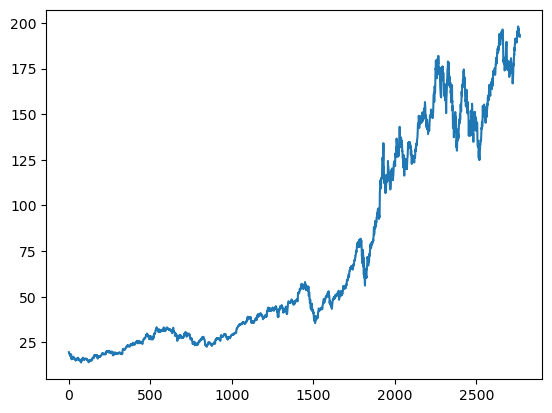

In [6]:
plt.plot(df.Close)
plt.show()

In [7]:
df


,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200
...,...,...,...,...,...
2763,195.179993,195.410004,192.970001,193.600006,37122800
2764,193.610001,193.889999,192.830002,193.050003,28919300
2765,192.490005,193.500000,191.089996,193.149994,48087700
2766,194.139999,194.660004,193.169998,193.580002,34049900


In [8]:
ma100 = df.Close.rolling(100).mean()  
print(ma100)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    181.768301
2764    181.787101
2765    181.898701
2766    182.046001
2767    182.173301
Name: Close, Length: 2768, dtype: float64


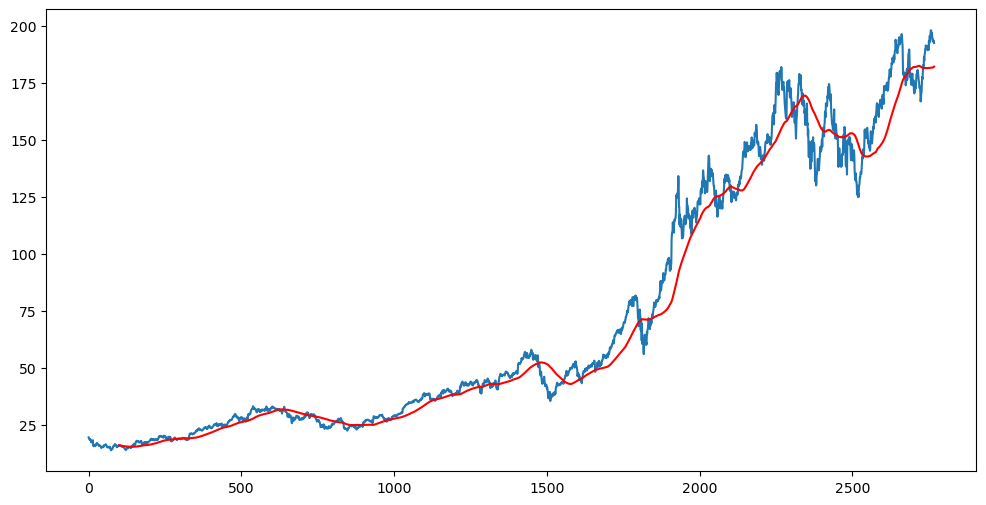

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(100).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    181.768301
2764    181.787101
2765    181.898701
2766    182.046001
2767    182.173301
Name: Close, Length: 2768, dtype: float64

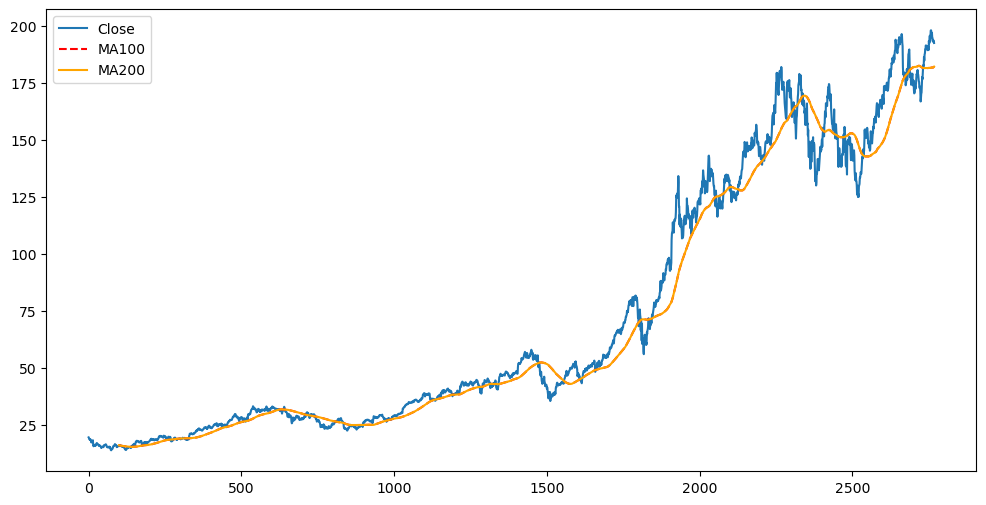

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(df.Close, label='Close')  
plt.plot(ma100, 'r--',  label='MA100')  
plt.plot(ma200, 'orange', label='MA200')  

plt.legend()  
plt.show()

In [12]:
df.shape

(2768, 5)

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [14]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [15]:
data_testing.head()

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [16]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array) 

[[0.04708139]
 [0.04502289]
 [0.04053753]
 ...
 [0.82234426]
 [0.85977174]
 [0.82791678]]


In [18]:
data_training_array.shape

(1937, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)  

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [21]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)




Epoch 1/50

58/58 [==============================] - 37s 386ms/step - loss: 0.0326
Epoch 2/50
58/58 [==============================] - 23s 397ms/step - loss: 0.0282
Epoch 3/50
58/58 [==============================] - 24s 405ms/step - loss: 0.0282
Epoch 4/50
58/58 [==============================] - 22s 376ms/step - loss: 0.0279
Epoch 5/50
58/58 [==============================] - 21s 362ms/step - loss: 0.0278
Epoch 6/50
58/58 [==============================] - 21s 365ms/step - loss: 0.0276
Epoch 7/50
58/58 [==============================] - 22s 375ms/step - loss: 0.0275
Epoch 8/50
58/58 [==============================] - 22s 378ms/step - loss: 0.0278
Epoch 9/50
58/58 [==============================] - 22s 387ms/step - loss: 0.0274
Epoch 10/50
58/58 [==============================] - 21s 368ms/step - loss: 0.0273
Epoch 11/50
58/58 [==============================] - 21s 369ms/step - loss: 0.0273
Epoch 12/50
58/58 [==============================] - 22s 385ms/step - loss: 0.0273
Epoch 13/50

In [24]:
model.save('keras_model.h5')

C:\Users\csy24\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
data_testing.head()


,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [26]:
data_training.tail(100)

,Close
1837,67.092499
1838,69.025002
1839,68.757500
1840,70.742500
1841,70.792503
...,...
1932,120.879997
1933,120.959999
1934,112.820000
1935,117.320000


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = pd.concat([past_100_days, data_training], ignore_index=True)

In [29]:
final_df.head()

,Close
0,67.092499
1,69.025002
2,68.757500
3,70.742500
4,70.792503


In [30]:
input_data =scaler.fit_transform(final_df)
print(input_data)

[[0.4420186 ]
 [0.45809165]
 [0.45586678]
 ...
 [0.82234426]
 [0.85977174]
 [0.82791678]]


In [31]:
input_data.shape

(2037, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])
    

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1937, 100, 1)
(1937,)


In [34]:
y_predicted = model.predict(x_test) 

61/61 [==============================] - 10s 133ms/step


In [35]:
y_predicted.shape

(1937, 100, 1)

In [36]:
y_test

array([0.04708139, 0.04502289, 0.04053753, ..., 0.82234426, 0.85977174,
       0.82791678])

In [37]:
scaler.scale_

array([0.00831722])

In [38]:
scale_factor = 1/0.0378916
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\csy24\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\csy24\AppData\Local\Temp\ipykernel_11672\3097560422.py", line 4, in <module>
    plt.plot(y_predicted, 'r', label='Predicted Price')
  File "C:\Users\csy24\anaconda3\Lib\site-packages\matplotlib\pyplot.py", line 2812, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "C:\Users\csy24\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py", line 1688, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\csy24\anaconda3\Lib\site-packages\matplotlib\axes\_base.py", line 311, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "C:\Users\csy24\anaconda3\Lib\site-packages\matplotlib\axes\_base.py", line 507, in _plot_args
    raise ValueError(f"x and y c

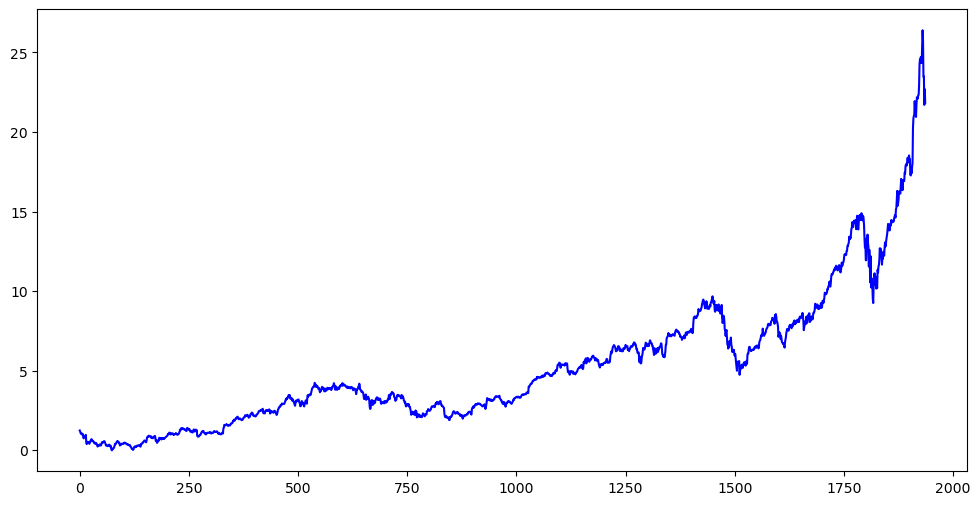

In [39]:
plt.figure(figsize=(12,6))
 
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
